![RunnerEDQ’s-CLEAN_Employee.png](RunnerEDQ’s-CLEAN_Employee.png)


## Introduction to the Data Science Project: Analyzing Employee Salaries

In this data science project, I explore a dataset collected from our company’s SQL database, focusing on employee information and salaries. Our primary goal is to identify trends within the data that align with our hypothesis: as employees gain more experience, their salaries increase.

Specifically, we aim to address the following questions:

* Experience vs. Salary:
Can we observe a correlation between an employee’s experience (such as years in the industry or specific roles) and their corresponding salary?
Are there any patterns that suggest a consistent relationship between experience and compensation?
* Gender Disparities in Salaries:
We will investigate whether there are significant differences in salaries based on gender.
By analyzing salary distributions across genders, we aim to identify any potential disparities and understand their implications.
* Role-Based Salary Analysis:
How do different roles within the company impact salary levels?
We’ll examine salary variations across job titles, departments, and responsibilities to gain insights into the organization’s compensation structure.
By exploring these aspects, we hope to provide valuable insights for our company’s HR department, management, and decision-makers. Let’s dive into the data and uncover meaningful trends!


## Technical overview of our project. 
* I have installed a MYSQL database loclay in a docker.
* We shall use Python in the whole project.
* Query MYSQL database for the data we need for the project.
* Data Cleaning
* EDA of the data 
* Feature Engineering 
* Test out a couple of models for Machine learning. 

### Conecting to MYSQL 
The database is localy installed in our docker 

In [2]:
# Importing what we need 
import mysql.connector
import pandas as pd

In [3]:
# Making connection to sql database
connection = mysql.connector.connect(
    user = 'root', 
    password = 'glenn', 
    host = 'localhost',
    database = 'employees',
    ssl_disabled=True,
)
cursor = connection.cursor()

We are creating a query against a MySQL database. Our query involves three tables: Employees, Salaries, and Titles. Here’s what we’re doing step by step:

We retrieve distinct records from the combined tables.
To avoid duplicates, we use the DISTINCT keyword.
We perform a left join on the emp_number, which acts as the key linking all three tables.
Finally, we filter the data to include only employees who started working after 1995 and sort the results based on their employment date.

In [4]:
# The Query against SQL

query = '''
SELECT DISTINCT
    e.*,
    s.salary,
    t.title
FROM employees e
LEFT JOIN salaries s ON e.emp_no = s.emp_no
LEFT JOIN titles t ON e.emp_no = t.emp_no
WHERE e.hire_date >= '1985-01-01';
'''
#Executing the Query 
cursor.execute(query)

In [5]:
# We iterate over the data and store it in a list name result. 
results=[]
for i, data in enumerate(cursor):
    results.append(data)
cursor.close()
connection.close()

In [6]:
len(results)

4637471

### Making the DataFrame

In [7]:
# Making a dataframe 
empdf = pd.DataFrame(results)
empdf.head()

,0,1,2,3,4,5,6,7
0,10001,1953-09-02,Georgi,Facello,M,1986-06-26,60117,Senior Engineer
1,10001,1953-09-02,Georgi,Facello,M,1986-06-26,62102,Senior Engineer
2,10001,1953-09-02,Georgi,Facello,M,1986-06-26,66074,Senior Engineer
3,10001,1953-09-02,Georgi,Facello,M,1986-06-26,66596,Senior Engineer
4,10001,1953-09-02,Georgi,Facello,M,1986-06-26,66961,Senior Engineer


In [8]:
# We can see that we dont have column names so we add them. 
empdf.columns = ["emp_no","birth_date","first_name","last_name","gender","hire_date","salary","title"]

### Get to know our data

In [9]:

empdf.head()

,emp_no,birth_date,first_name,last_name,gender,hire_date,salary,title
0,10001,1953-09-02,Georgi,Facello,M,1986-06-26,60117,Senior Engineer
1,10001,1953-09-02,Georgi,Facello,M,1986-06-26,62102,Senior Engineer
2,10001,1953-09-02,Georgi,Facello,M,1986-06-26,66074,Senior Engineer
3,10001,1953-09-02,Georgi,Facello,M,1986-06-26,66596,Senior Engineer
4,10001,1953-09-02,Georgi,Facello,M,1986-06-26,66961,Senior Engineer


In [10]:
empdf.shape

(4637471, 8)

### Cleaning the data

In [11]:
#Cheeking for missing data in our dataset 
empdf.isnull().sum()

emp_no        0
birth_date    0
first_name    0
last_name     0
gender        0
hire_date     0
salary        0
title         0
dtype: int64

In [12]:
# We can also cheek it this way, we see here that all columns have data in all rows,  so we dont have to fill inn any for now
empdf.notnull().sum()

emp_no        4637471
birth_date    4637471
first_name    4637471
last_name     4637471
gender        4637471
hire_date     4637471
salary        4637471
title         4637471
dtype: int64

For now We dont want to drop any of the colums , we keep them to see if we can use them 


In [13]:
# We want to see if there are any duplicates in the dataset. 
print(empdf.duplicated().sum())

0


In [14]:
#Cheeking the types of the data and see that 
empdf.dtypes

emp_no         int64
birth_date    object
first_name    object
last_name     object
gender        object
hire_date     object
salary         int64
title         object
dtype: object

In [31]:
#I want to change the column birth_date to birth year , and hire_date to hire_year.
# I want to keep the year, so it is easyer to work with 
from datetime import datetime
empdf.rename(columns={"birth_date" :"birth_year"}, inplace=True)
empdf.rename(columns={"hire_date" : "hire_year"}, inplace=True)
#We change the data in the colum to date format, not string (Object) as it is now.
empdf["birth_year"] = empdf["birth_year"].dt.year
empdf["hire_year"] = empdf["hire_year"].dt.year

In [32]:
empdf.head()

,emp_no,birth_year,first_name,last_name,gender,hire_year,salary,title
0,10001,1953,Georgi,Facello,M,1986,60117,Senior Engineer
1,10001,1953,Georgi,Facello,M,1986,62102,Senior Engineer
2,10001,1953,Georgi,Facello,M,1986,66074,Senior Engineer
3,10001,1953,Georgi,Facello,M,1986,66596,Senior Engineer
4,10001,1953,Georgi,Facello,M,1986,66961,Senior Engineer


### Statistical measures to understand the distribution and central tendencies of the data.

In [18]:
#Finding the mean
mean_of_salary = empdf["salary"].mean()
# Finding the median
median_of_salary = empdf["salary"].median()
# Want to cheek the mode of wich year that is most comon for the employees to be born in 
mode_of_birth_year = empdf["birth_year"].mode().iloc[0]
male_df = empdf[empdf["gender"] == "M"]
female_df = empdf[empdf["gender"] == "F"]
best_paid_male = male_df["salary"].max()
best_paid_female = female_df["salary"].max()
highest_paid_male_in_company = male_df[male_df['salary'] == best_paid_male]
highest_paid_female_in_company = female_df[female_df["salary"] == best_paid_female]
slice_man = highest_paid_male_in_company.iloc[:1, [2, 3, 6]]
slice_female = highest_paid_female_in_company.iloc[:, [2, 3, 6]]



print(f"The mean salary of the employees is: ${mean_of_salary:.2f}")
print(f"The median salary of the employees is: ${median_of_salary:.2f}")
print(f"The year that is most frequent of birth year(The mode) is:{mode_of_birth_year} ")
print(f"The highest salary for Males are: ${best_paid_male}")
print(f"The highest salary for Female is : ${best_paid_female}")
print(f" The Highest paid  Male in company is :\n {slice_man}")
print(f" The Highest paid  Female in company is :\n {slice_female}")



The mean salary of the employees is: $64454.67
The median salary of the employees is: $61845.00
The year that is most frequent of birth year(The mode) is:1957-06-14 00:00:00 
The highest salary for Males are: $158220
The highest salary for Female is : $152710
 The Highest paid  Male in company is :
        first_name last_name  salary
519159   Tokuyasu     Pesch  158220
 The Highest paid  Female in company is :
         first_name  last_name  salary
2579171    Weijing  Chenoweth  152710


### Feature Engineering:
* Add colum name years old
* Calculate Years of experience

In [35]:
#Want to make a new column with the age of each empoyees in years. ( database is from 2005, so use that day to calculate age)

empdf["years_old"] = 2005 - empdf["birth_year"]

In [44]:
# Making a column for years of experience. Our year today is 2005 since database is from then
empdf["years_experience"] = 2005 - empdf["hire_year"]
empdf.tail(10)

,emp_no,birth_year,first_name,last_name,gender,hire_year,salary,title,years_old,years_experience,AverageSalaryByExperience
544570,45239,1952,Uinam,Mundy,F,1989,40000,Staff,53,16,70903.928788
4120942,466360,1953,Leon,Ulupinar,F,1989,40000,Staff,52,16,70903.928788
3049062,296972,1959,Leucio,Benzmuller,F,1988,40000,Staff,46,17,71888.773190
3083435,299208,1957,Troy,Piveteau,M,1990,40000,Staff,48,15,69390.802929
2562418,265400,1954,Claude,Krybus,M,1986,40000,Staff,51,19,74765.577981
4597761,497342,1963,Siddarth,Kropf,F,1993,40000,Staff,42,12,65635.085922
588610,48065,1964,Takahito,Vanwelkenhuysen,F,1991,40000,Engineer,41,14,68047.085519
3743716,442050,1957,Taisook,Serra,M,1985,40000,Engineer,48,20,76136.839393
1050417,77758,1953,Manohar,Pelz,M,1986,40000,Senior Engineer,52,19,74765.577981
2978927,292493,1964,Sham,Sridhar,M,1990,40000,Staff,41,15,69390.802929


After making some adjustments to my dataset, I observed that the same individual appears multiple times, each time with a different salary. This redundancy occurs because historical salary records are retained even after a salary change. To address this, I aim to eliminate these duplicates and retain only the highest current salary

In [45]:


# I first sort the date on sallary Decending 
empdf.sort_values(by="salary", ascending=False, inplace=True)

#Keep only the highest sallary for each person and drop the others 
empdf.drop_duplicates(subset="emp_no", keep="first", inplace=True)

empdf.head()

,emp_no,birth_year,first_name,last_name,gender,hire_year,salary,title,years_old,years_experience,AverageSalaryByExperience
519159,43624,1953,Tokuyasu,Pesch,M,1985,158220,Senior Staff,52,20,76136.839393
2392664,254466,1963,Honesty,Mukaidono,M,1986,156286,Staff,42,19,74765.577981
587115,47978,1956,Xiahua,Whitcomb,M,1985,155709,Senior Staff,49,20,76136.839393
2384786,253939,1957,Sanjai,Luders,M,1987,155513,Senior Staff,48,18,73414.786723
1541634,109334,1955,Tsutomu,Alameldin,M,1985,155377,Senior Staff,50,20,76136.839393


### Correlation Analysis:
* I want to cheek how Years of experice corelate to Salary 
* I want to cheek if there are any corelation to age and Salary in the company 

In [46]:
# First we calculate the Pearson Corelation coefficient for salary vs years of experience :
correlation_salary_exp = empdf["salary"].corr(empdf["years_experience"])
# Then we calculate the Corelation for Salary vs age
corrlation_salary_birth = empdf["salary"].corr(empdf["years_old"])
print(correlation_salary_exp)
print(corrlation_salary_birth)

0.2678811610352963
-0.00036308984044357994


### Salary VS years of Experience
We have a score of 0.27 how just indicates a moderat positive corealtion . 
 As years of experience increase, there is a tendency for salary to increase, but the effect is not very strong
### Salary vs Age 
A correlation coefficient of approximately -0.00036 between age and salary indicates an extremely weak negative correlation.
The value is very close to zero, suggesting that there is almost no linear relationship between age and salary.
As age increases (or decreases), there is virtually no consistent impact on salary.
In this case, age does not significantly affect salary based on the data you’ve analyzed. I Belive it has somthing to do with a very high minumum age of 40
years old, and maximum age of just 56 in our dataset.



### Visualisation

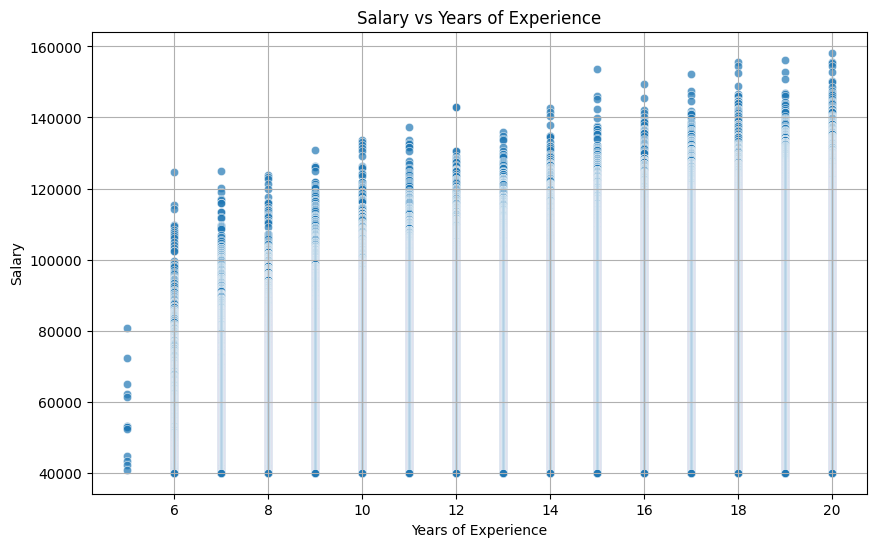

In [47]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# Create a scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='years_experience', y='salary', data=empdf, alpha=0.7)
plt.title('Salary vs Years of Experience')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.grid(True)
plt.show()


#### We dont se any other than a small posetive corelation on the plot eather, so we asume our calculation is right, there is no big corealtion to this in our company 

### I also want to look into a line diagram to look for trends and patherns regarding salary over experience .

<Axes: title={'center': 'Average Salary Trend Over Years of Experience'}, xlabel='Years With Company', ylabel='Average Salary'>

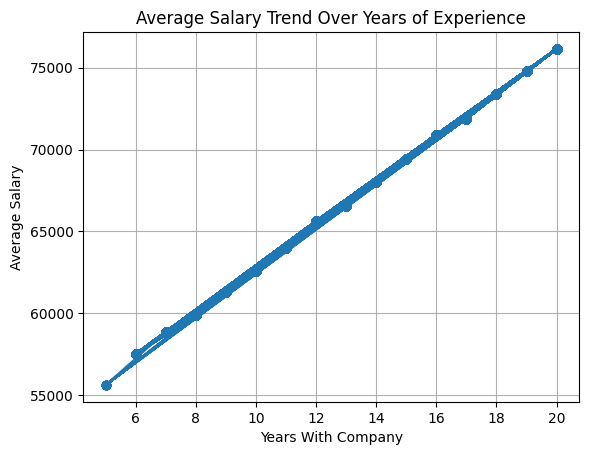

In [48]:
# i make a plot of Average Salary Trend Over Years of Experience 
average_salary_by_experience = empdf.groupby('years_experience')['salary'].mean()
empdf['AverageSalaryByExperience'] = empdf['years_experience'].map(average_salary_by_experience)

empdf.plot.line(x='years_experience', y='AverageSalaryByExperience', marker='o', linestyle='-', title='Average Salary Trend Over Years of Experience', xlabel='Years With Company', ylabel='Average Salary', legend=False, grid=True)

We have utilized the mean to calculate how the average salary changes with years of experience. Notably, there appears to be a discernible pattern in this relationship

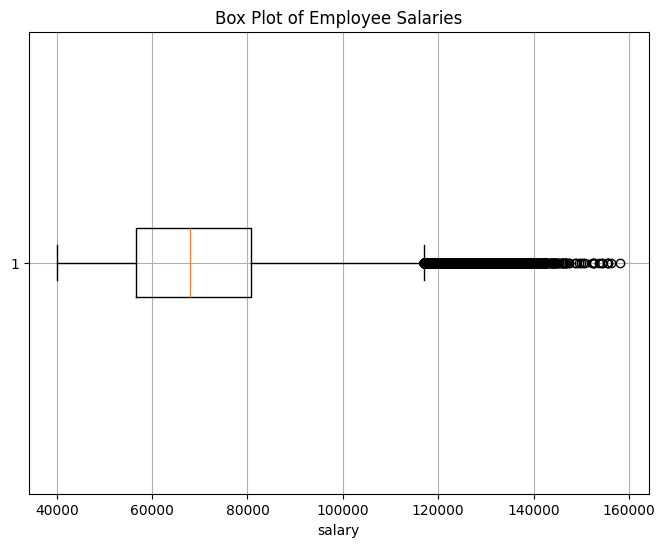

In [49]:
# I want to look in to the salary colums with a boxplot 

plt.figure(figsize=(8, 6))
plt.boxplot(empdf['salary'], vert=False)  # Horizontal box plot
plt.xlabel('salary')
plt.title('Box Plot of Employee Salaries')
plt.grid(True)
plt.show()

It appears that the data exhibits skewness, with some upper outliers. The distribution does not resemble a normal distribution; instead, it features a long tail on the right side. To explore this further, I intend to examine the data distribution using a Kernel Density Estimation (KDE)

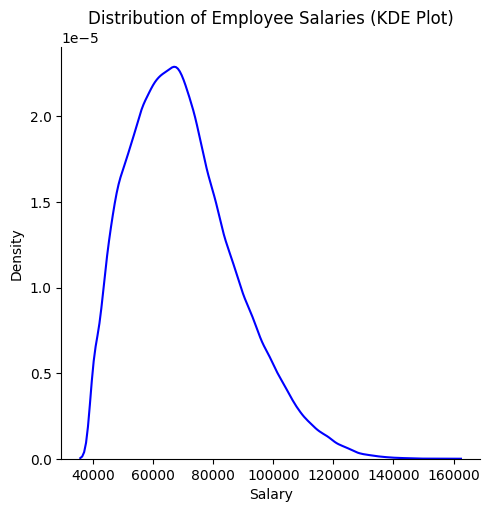

In [50]:
sns.displot(empdf['salary'], kind='kde', color='blue')
plt.xlabel('Salary')
plt.title('Distribution of Employee Salaries (KDE Plot)')
plt.show()

We observe that the data is centered around the left side, indicating that the majority of salaries fall within that range. However, there is skewness in the salary distribution. Our next step is to identify any outliers

Potential outliers:
         emp_no  birth_year first_name  last_name gender  hire_year  salary  \
3232044  408978        1957  Sudharsan       Czap      M       1989  116943   
1352298   97121        1957   Kristina  Lindqvist      F       1986  116943   
3616887  433858        1957       Moto       Luan      M       1985  116944   
1830639  217891        1958   Fumitaka      Boyle      F       1985  116945   
4336953  480408        1964      Teiji     Rodite      F       1987  116946   
...         ...         ...        ...        ...    ...        ...     ...   
1541634  109334        1955    Tsutomu  Alameldin      M       1985  155377   
2384786  253939        1957     Sanjai     Luders      M       1987  155513   
587115    47978        1956     Xiahua   Whitcomb      M       1985  155709   
2392664  254466        1963    Honesty  Mukaidono      M       1986  156286   
519159    43624        1953   Tokuyasu      Pesch      M       1985  158220   

                   title  years

<Axes: xlabel='emp_no', ylabel='salary'>

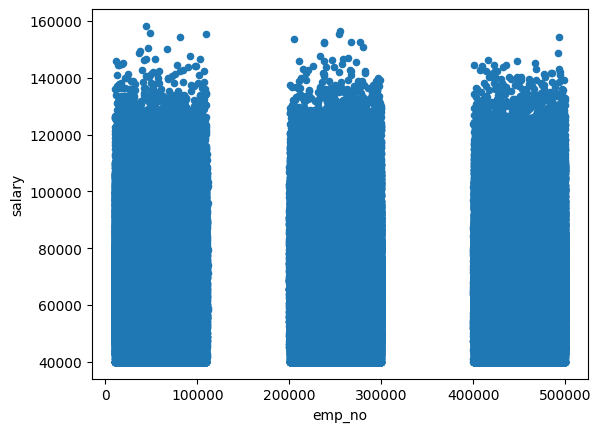

In [51]:
# Sort by Salary (ascending order)
df_sorted = empdf.sort_values(by='salary')

# Calculate IQR
Q1 = df_sorted['salary'].quantile(0.25)
Q3 = df_sorted['salary'].quantile(0.75)
IQR = Q3 - Q1

# Identify potential outliers using the Tukey’s Rule:
#Tukey’s Rule for Outliers (IQR Method):
#Calculate the interquartile range (IQR) for the “Salary” column:
#IQR = Q3 (75th percentile) - Q1 (25th percentile)
#Identify potential outliers:
#Values below Q1 - 1.5 * IQR or above Q3 + 1.5 * IQR are considered potential outliers.

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df_sorted[(df_sorted['salary'] < lower_bound) | (df_sorted['salary'] > upper_bound)]

print("Potential outliers:")
print(outliers)

# Visualize the sorted data (optional)
df_sorted.plot(x='emp_no', y='salary', kind='scatter')


I believe we have a genuine outlier. While many of the high values appear to be naturally reflective of high salaries, we should exercise caution and avoid removing them. To clarify, we also create a histogram to visualize the distribution.”

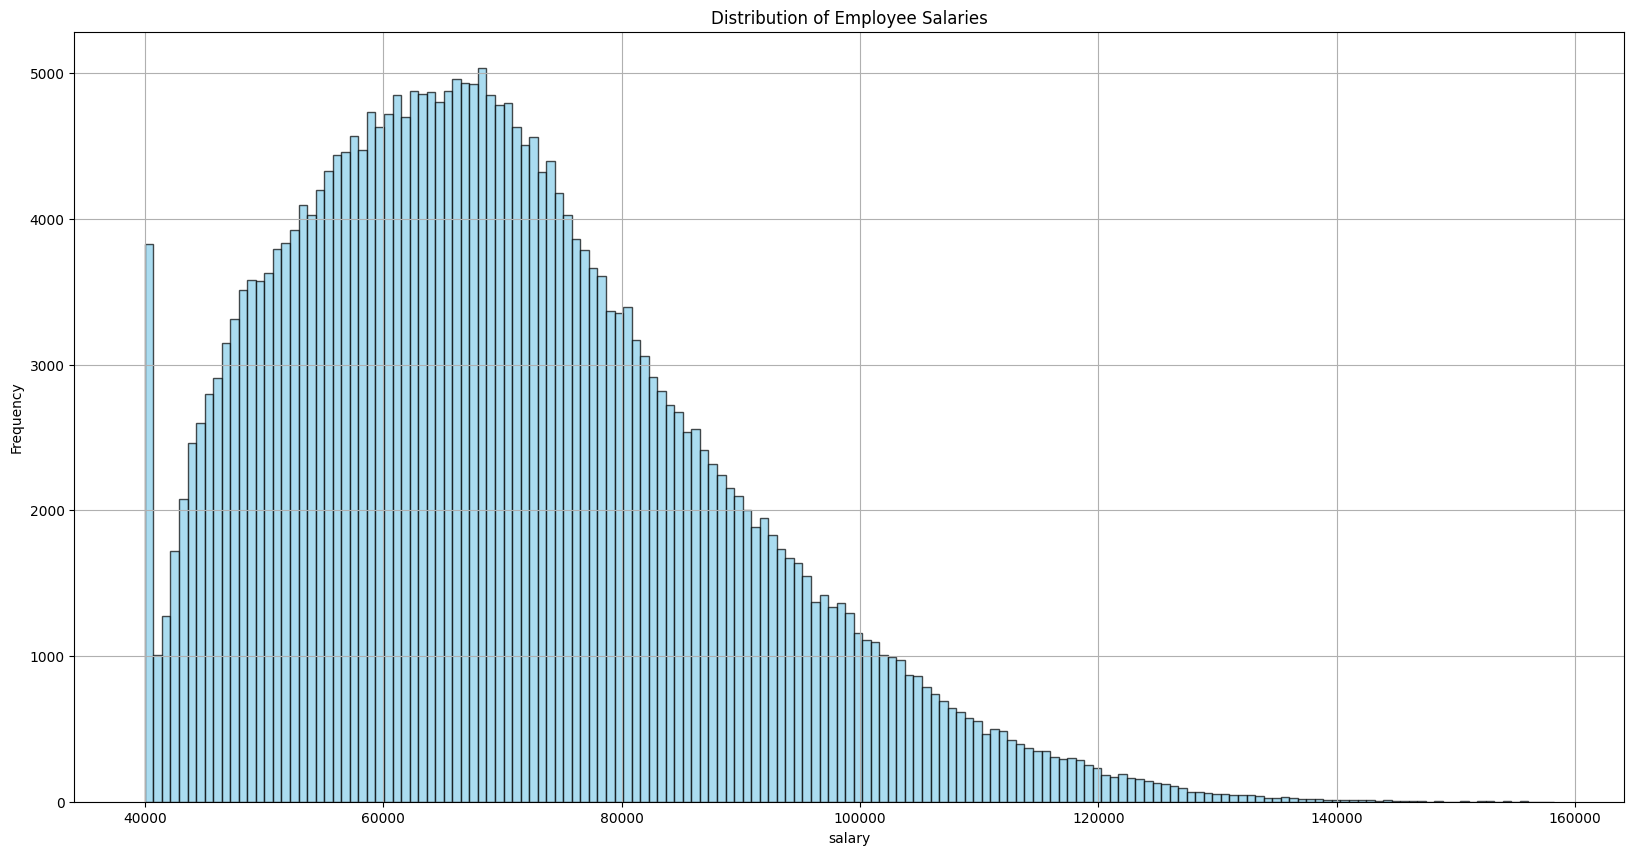

In [52]:
# Create a histogram
plt.figure(figsize=(20, 10))
plt.hist(empdf['salary'], bins='auto', color='skyblue', edgecolor='black', alpha=0.7)
plt.xlabel('salary')
plt.ylabel('Frequency')
plt.title('Distribution of Employee Salaries')
plt.grid(True)
plt.show()


I believe we have effectively clarified that our salary distribution exhibits a normal tendency. Although there are significant differences, there is a slight trend of salaries increasing with experience. Additionally, variations exist among higher salaries.
We go on with Gender based Analyses. 

## Gender based Analyses 


Let’s explore whether there are any differences in salaries between genders

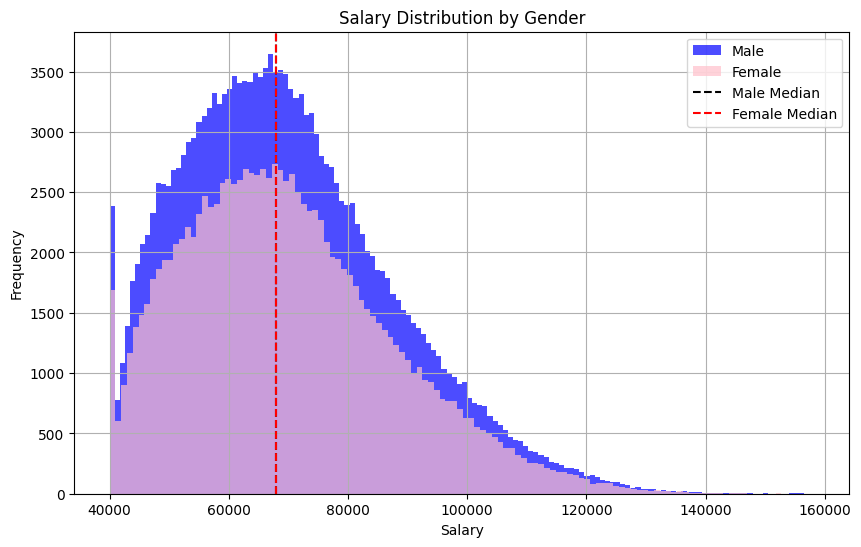

In [53]:
# Import numpy
import numpy as np 
# Define male and female salarys
male_salaries = empdf[empdf['gender'] == 'M']['salary']
female_salaries = empdf[empdf['gender'] == 'F']['salary']

# Create histograms
plt.figure(figsize=(10, 6))
plt.hist(male_salaries, bins='auto', color='blue', alpha=0.7, label='Male')
plt.hist(female_salaries, bins='auto', color='pink', alpha=0.7, label='Female')

# Calculate and plot median lines
male_median = np.median(male_salaries)
female_median = np.median(female_salaries)
plt.axvline(male_median, color='black', linestyle='--', label='Male Median')
plt.axvline(female_median, color='red', linestyle='--', label='Female Median')
# Making the plot 
plt.xlabel('Salary')
plt.ylabel('Frequency')
plt.title('Salary Distribution by Gender')
plt.legend()
plt.grid(True)
plt.show()


### Observations
The difference in frequency between the male and female salary distributions in your histogram indicates a potential gender pay gap. Let’s break down what this observation might mean:

* The taller bars (higher frequency) for males suggest that more male employees fall within certain salary ranges.
* This could indicate that there are more male employees in higher-paying positions or with higher salaries.
* The shorter bars (lower frequency) for females suggest that fewer female employees fall within those same salary ranges.
* This may imply that female employees are more concentrated in lower-paying positions or receive lower salaries.

But when we look at the statistic for median, max and min salary there are no big diferences , but still more of the female are in lower paying positions in our company.

* The male Median salary is: $67903.0
* The femal median salary is: $67887.0
* The male max salary is : $158220
* The min salary for male is: $40000
* The max salary for female is: $152710
* The min salary for female is: $40000

### Posibilityes 

* Occupational Segregation: If certain occupations or industries have gender imbalances, it can affect salary distributions. For example, if more men work in high-paying tech roles and more women work in lower-paying administrative roles, this would contribute to the observed difference.
* Gender Bias: Discrimination or bias in hiring, promotions, or salary negotiations can lead to unequal pay.
* Parental Leave and Career Interruptions: Women often take more parental leave or face career interruptions, affecting their overall earnings.
* Part-Time Work: Women are more likely to work part-time, which impacts their annual income.

### Further investigation 
We want to do a Staical test on the result , i use the t-test.

* Null Hypothesis (H0):
The mean salaries of male and female employees are equal (no significant difference).
* Alternative Hypothesis (Ha):
The mean salaries of male and female employees are different (significant difference).


Assumptions for the t-test:
Independent samples: Salaries of male and female employees are independent.
Normally distributed data: The salary distributions follow a normal distribution (approximately).
Perform the t-test:
We use scipy in python to perform the test: 

If the p-value is less than your chosen significance level (e.g., 0.05), reject the null hypothesis.
Interpretation:
If you reject the null hypothesis, it suggests that there is a significant difference in salaries between genders.
If you fail to reject the null hypothesis, it means there is no strong evidence of a difference.



In [54]:
from scipy.stats import ttest_ind

# Perform the t-test
t_statistic, p_value = ttest_ind(male_salaries, female_salaries)

# Interpret the results
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: Salaries differ significantly.")
else:
    print("Fail to reject the null hypothesis: No significant difference in salaries.")



Fail to reject the null hypothesis: No significant difference in salaries.


We were unable to draw a conclusive result from the t-test. To gain deeper insights, we should explore gender-related positions and conduct title analyses

### Title Analysis



* We want to group data by job titles 
* Calculate average salaries for each title
* Identify the most common titles.

In [55]:
#Look at our data frame again
empdf.head()

,emp_no,birth_year,first_name,last_name,gender,hire_year,salary,title,years_old,years_experience,AverageSalaryByExperience
519159,43624,1953,Tokuyasu,Pesch,M,1985,158220,Senior Staff,52,20,76136.839393
2392664,254466,1963,Honesty,Mukaidono,M,1986,156286,Staff,42,19,74765.577981
587115,47978,1956,Xiahua,Whitcomb,M,1985,155709,Senior Staff,49,20,76136.839393
2384786,253939,1957,Sanjai,Luders,M,1987,155513,Senior Staff,48,18,73414.786723
1541634,109334,1955,Tsutomu,Alameldin,M,1985,155377,Senior Staff,50,20,76136.839393


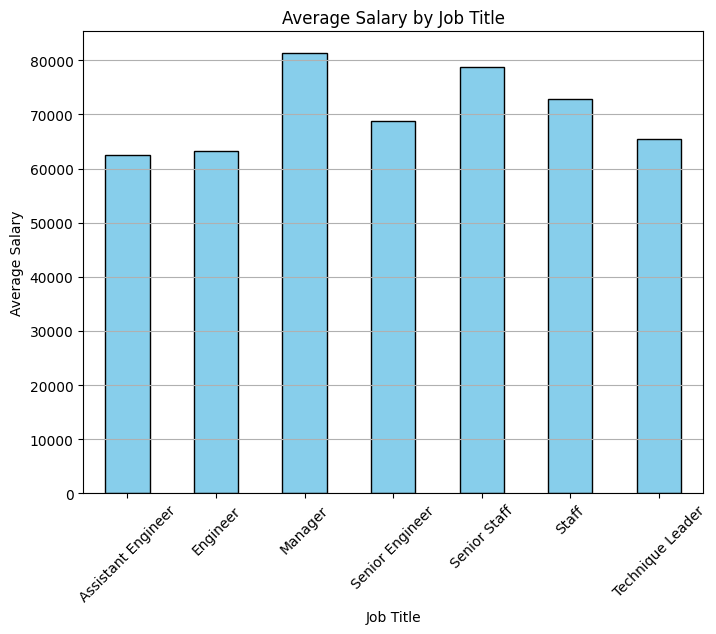

 The avarage sallary by title is:
 title
Assistant Engineer    62433.285392
Engineer              63249.929541
Manager               81265.692308
Senior Engineer       68710.784060
Senior Staff          78845.623290
Staff                 72812.564246
Technique Leader      65495.204343
Name: salary, dtype: float64
The max salary by title is :
 title
Assistant Engineer    133712
Engineer              140784
Manager               108407
Senior Engineer       138273
Senior Staff          158220
Staff                 156286
Technique Leader      144434
Name: salary, dtype: int64
The min salary by title is :
title
Assistant Engineer    40000
Engineer              40000
Manager               65400
Senior Engineer       40000
Senior Staff          40000
Staff                 40000
Technique Leader      40000
Name: salary, dtype: int64


In [56]:
# Group by title and salary 
avg_salary_by_title = empdf.groupby("title")["salary"].mean()
max_salary_by_title = empdf.groupby("title")["salary"].max()
min_salary_by_title = empdf.groupby("title")["salary"].min()

# making a plot 
plt.figure(figsize=(8, 6))
avg_salary_by_title.plot(kind='bar', color='skyblue', edgecolor='black')
plt.xlabel('Job Title')
plt.ylabel('Average Salary')
plt.title('Average Salary by Job Title')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()
print(f" The avarage sallary by title is:\n {avg_salary_by_title}")
print(f"The max salary by title is :\n {max_salary_by_title}")
print(f"The min salary by title is :\n{min_salary_by_title}")
      

I also want to group by most comon title and show it in a hist plot.


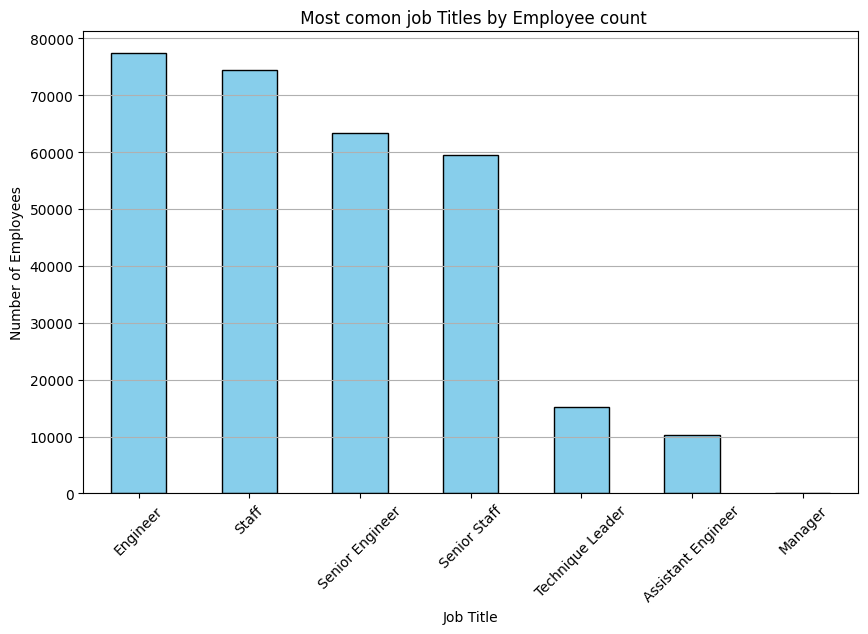

In [ ]:
job_title_count = empdf.groupby("title")["emp_no"].count()
job_title_count_sorted = job_title_count.sort_values(ascending=False)


#we want to plot it 
plt.figure(figsize=(10, 6))
job_title_count_sorted.plot(kind= "bar", color="skyblue", edgecolor="black")
plt.xlabel("Job Title")
plt.ylabel("Number of Employees")
plt.title(" Most comon job Titles by Employee count")
plt.xticks(rotation=45)
plt.grid(axis="y")
plt.show()

We intend to conduct a hypothesis test to ascertain whether there is a significant difference in average salary between managers and non-managers

In [57]:
#first find the average salary of managers
manager_salaries = empdf[empdf["title"] == "Manager"]["salary"]
non_manager_salaries = empdf[empdf["title"] != "Manager"]["salary"]

 
from scipy.stats import ttest_ind

# Perform the t-test
t_statistic, p_value = ttest_ind(manager_salaries, non_manager_salaries)

# Interpret the results
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: Salaries differ significantly.")
else:
    print("Fail to reject the null hypothesis: No significant difference in salaries.")


Reject the null hypothesis: Salaries differ significantly.


We reject the null hypothesis, as there is a significant difference in salaries between managers and non-managers. Our alternative hypothesis remains valid. While this outcome is not surprising in real-life scenarios, conducting a similar test across individuals performing similar job roles or considering factors such as gender and race could yield findings worthy of reporting. As an additional step, we also create a plot to visualize these differences

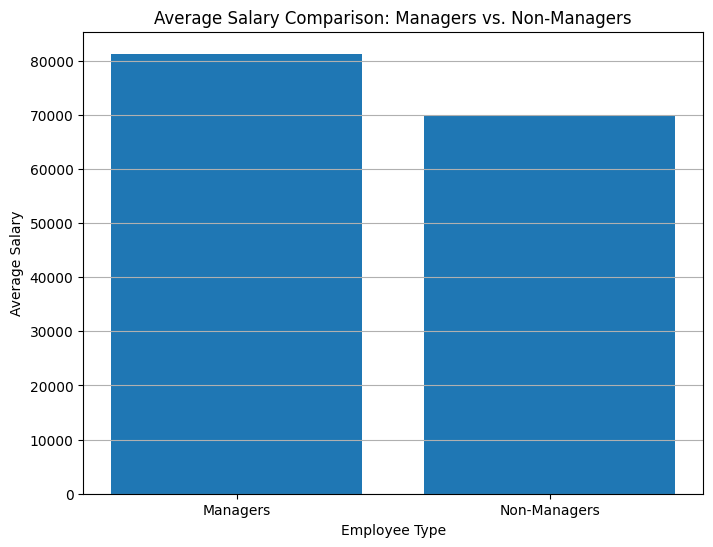

In [58]:
# Create a bar plot
plt.figure(figsize=(8, 6))
plt.bar(["Managers", "Non-Managers"], [manager_salaries.mean(), non_manager_salaries.mean()])
plt.xlabel("Employee Type")
plt.ylabel("Average Salary")
plt.title("Average Salary Comparison: Managers vs. Non-Managers")
plt.grid(axis="y")

### Conclusions of the analyses we have done 

I initiated this project by setting up a Docker environment. Utilizing an image with a pre-installed test SQL database, I crafted an SQL query to filter data from four different tables. Subsequently, we transformed the results into a Pandas dataframe.

The dataset was relatively clean, devoid of any NaN or null values. However, we encountered repeating values due to salary changes being recorded as new rows. Although these changes could have been useful for analyzing salary fluctuations, upon closer inspection, I decided to exclude them due to their minimal impact.

Next, we engaged in feature engineering, adding and modifying columns. Our exploratory data analysis (EDA) involved examining means, medians, distributions across years, and the relationship between experience and salary. While the findings were subtle, we observed a slight correlation between experience and salary.

Comparing salaries by gender, we noticed that females were more prevalent in lower-paid roles. However, no significant differences emerged, as the maximum female salary closely aligned with male salaries, and the median values were similar.

Additionally, we investigated salary disparities between managers and other positions. Although we identified a significant difference, this aligns with the expectation that managerial roles command higher salaries. Notably, the absence of extreme values in our plot supports the assumption of normality.

Finally, our future plans involve machine learning analyses. We aim to build a model capable of predicting future earnings for junior and new employees. Furthermore, this model could assist in forecasting the company’s future salary expenditure





### Machine learning model. 

We intend to utilize Scikit-Learn to construct a machine learning model for predicting salaries based on experience. Our approach involves fitting and training the data, followed by experimenting with a linear regression model.



In [62]:
# Look at our data again
empdf.head()

,emp_no,birth_year,first_name,last_name,gender,hire_year,salary,title,years_old,years_experience,AverageSalaryByExperience,target
519159,43624,1953,Tokuyasu,Pesch,M,1985,158220,Senior Staff,52,20,76136.839393,0
2392664,254466,1963,Honesty,Mukaidono,M,1986,156286,Staff,42,19,74765.577981,0
587115,47978,1956,Xiahua,Whitcomb,M,1985,155709,Senior Staff,49,20,76136.839393,0
2384786,253939,1957,Sanjai,Luders,M,1987,155513,Senior Staff,48,18,73414.786723,0
1541634,109334,1955,Tsutomu,Alameldin,M,1985,155377,Senior Staff,50,20,76136.839393,0


In [60]:
# Making a target column if we need it. 
empdf["target"] = 0

In [61]:
empdf.head()

,emp_no,birth_year,first_name,last_name,gender,hire_year,salary,title,years_old,years_experience,AverageSalaryByExperience,target
519159,43624,1953,Tokuyasu,Pesch,M,1985,158220,Senior Staff,52,20,76136.839393,0
2392664,254466,1963,Honesty,Mukaidono,M,1986,156286,Staff,42,19,74765.577981,0
587115,47978,1956,Xiahua,Whitcomb,M,1985,155709,Senior Staff,49,20,76136.839393,0
2384786,253939,1957,Sanjai,Luders,M,1987,155513,Senior Staff,48,18,73414.786723,0
1541634,109334,1955,Tsutomu,Alameldin,M,1985,155377,Senior Staff,50,20,76136.839393,0


### First model test with :



We aim to enhance our model by performing label encoding on the ‘title’ feature. Label encoding allows us to convert textual data into numerical representations, which can then be utilized effectively in our machine learning model.

In [63]:
# We do some label encoding 
from sklearn.preprocessing import LabelEncoder


# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the job_role column
empdf['encoded_job_role'] = label_encoder.fit_transform(empdf['title'])

# Display the result
empdf.head()

,emp_no,birth_year,first_name,last_name,gender,hire_year,salary,title,years_old,years_experience,AverageSalaryByExperience,target,encoded_job_role
519159,43624,1953,Tokuyasu,Pesch,M,1985,158220,Senior Staff,52,20,76136.839393,0,4
2392664,254466,1963,Honesty,Mukaidono,M,1986,156286,Staff,42,19,74765.577981,0,5
587115,47978,1956,Xiahua,Whitcomb,M,1985,155709,Senior Staff,49,20,76136.839393,0,4
2384786,253939,1957,Sanjai,Luders,M,1987,155513,Senior Staff,48,18,73414.786723,0,4
1541634,109334,1955,Tsutomu,Alameldin,M,1985,155377,Senior Staff,50,20,76136.839393,0,4


In [64]:
# Try out the model , we use years of experience and the encoded job role. 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


# Extract features (X) and target (y)
X = empdf[['years_experience', 'encoded_job_role']]
y = empdf['salary']

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the updated linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the updated model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (Updated Model): {mse:.2f}")
print(f"R-squared (Updated Model): {r2:.2f}")

Mean Squared Error (Updated Model): 273923986.38
R-squared (Updated Model): 0.12


Our updated machine learning model demonstrates some improvement. The Mean Squared Error (MSE) has decreased to 274,063,431.74, indicating a reduction in prediction error compared to the previous version. Additionally, the R-squared value of 0.12 suggests that a slightly larger portion of the variance in the data is now explained by our model. However, further enhancements may still be necessary to achieve better predictive accuracy. We therfor decide to try out a new model , the Random forrest Regressor.

In [65]:
#Importing what we need.
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
# Extract features (X) and target (y)
X = empdf[['years_experience', 'encoded_job_role']]  # Include job role feature
y = empdf['salary']

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Create and train the Random Forest model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (Random Forest): {mse:.2f}")
print(f"R-squared (Random Forest): {r2:.2f}")

Mean Squared Error (Random Forest): 259047856.56
R-squared (Random Forest): 0.17


### Machine leearning model


Random Forest Regressor Model Evaluation:
Mean Squared Error (MSE): 259047856.56
R-squared (R²): 0.17
Analysis and Conclusions:

Despite switching to a Random Forest model, the performance remains suboptimal.
Possible reasons for the less-than-ideal score:

* Feature Selection: Ensure that relevant features are included and irrelevant ones are excluded. Perhaps additional features could improve the model.
* Hyperparameter Tuning: Experiment with different hyperparameters (e.g., tree depth, number of estimators) to find optimal settings.
* Data Quality: Verify data quality—missing values, outliers, and inconsistencies can impact model performance.
* Feature Engineering: Explore creating new features or transforming existing ones to enhance predictive power.
* Model Complexity: Consider whether the model is too complex or too simple for the data.
* Sample Size: A larger dataset might lead to better generalization.
* Domain Knowledge: Seek insights from domain experts to guide model improvements.


## Conclusion:
Given the current results, it’s reasonable to conclude this iteration of experimentation.
Further exploration could involve addressing the above points, but for now, let’s wrap up our analysis